## Libraries

In [808]:
import urllib.request 
import urllib.parse
import urllib.error
import ssl
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup as BS
import re
import string
import pandas as pd
import numpy as np
import csv
import time
import math
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import OneHotEncoder
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR

In [809]:
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

## Scraping property url

In [2016]:
property_url=[]

# urls = ['https://www.redfin.com/county/303/CA/Alameda','https://www.redfin.com/county/303/CA/Alameda-County','https://www.redfin.com/county/303/CA/Alameda-County/page-2',
#         'https://www.redfin.com/county/303/CA/Alameda-County/page-3','https://www.redfin.com/county/303/CA/Alameda-County/page-4','https://www.redfin.com/county/303/CA/Alameda-County/page-5','https://www.redfin.com/county/303/CA/Alameda-County/page-6','https://www.redfin.com/county/303/CA/Alameda-County/page-7','https://www.redfin.com/county/303/CA/Alameda-County/page-8','https://www.redfin.com/county/303/CA/Alameda-County/page-9','https://www.redfin.com/county/343/CA/San-Mateo-County','https://www.redfin.com/county/343/CA/San-Mateo-County/page-2','https://www.redfin.com/county/343/CA/San-Mateo-County/page-3','https://www.redfin.com/county/343/CA/San-Mateo-County/page-4','https://www.redfin.com/county/343/CA/San-Mateo-County/page-5','https://www.redfin.com/county/343/CA/San-Mateo-County/page-6','https://www.redfin.com/county/345/CA/Santa-Clara-County','https://www.redfin.com/county/345/CA/Santa-Clara-County/page-2','https://www.redfin.com/county/345/CA/Santa-Clara-County/page-3','https://www.redfin.com/county/345/CA/Santa-Clara-County/page-4','https://www.redfin.com/county/345/CA/Santa-Clara-County/page-5','https://www.redfin.com/county/345/CA/Santa-Clara-County/page-6','https://www.redfin.com/county/345/CA/Santa-Clara-County/page-7','https://www.redfin.com/county/345/CA/Santa-Clara-County/page-8','https://www.redfin.com/county/345/CA/Santa-Clara-County/page-9','https://www.redfin.com/county/345/CA/Santa-Clara-County/page-10']
urls = urls = ['https://www.redfin.com/county/303/CA/Alameda','https://www.redfin.com/county/303/CA/Alameda-County','https://www.redfin.com/county/303/CA/Alameda-County/page-2',
        'https://www.redfin.com/county/303/CA/Alameda-County/page-3',
        'https://www.redfin.com/county/303/CA/Alameda-County/page-4',
        'https://www.redfin.com/county/303/CA/Alameda-County/page-5','https://www.redfin.com/county/309/CA/Contra-Costa-County','https://www.redfin.com/county/309/CA/Contra-Costa-County/page-2','https://www.redfin.com/county/309/CA/Contra-Costa-County/page-3','https://www.redfin.com/county/309/CA/Contra-Costa-County/page-4','https://www.redfin.com/county/309/CA/Contra-Costa-County/page-5','https://www.redfin.com/county/341/CA/San-Joaquin-County','https://www.redfin.com/county/341/CA/San-Joaquin-County/page-2','https://www.redfin.com/county/341/CA/San-Joaquin-County/page-3','https://www.redfin.com/county/341/CA/San-Joaquin-County/page-4','https://www.redfin.com/county/341/CA/San-Joaquin-County/page-5','https://www.redfin.com/city/13654/CA/Oakland','https://www.redfin.com/county/343/CA/San-Mateo-County','https://www.redfin.com/county/343/CA/San-Mateo-County/page-2','https://www.redfin.com/county/343/CA/San-Mateo-County/page-3','https://www.redfin.com/city/13654/CA/Oakland/page-2','https://www.redfin.com/city/13654/CA/Oakland/page-3','https://www.redfin.com/city/14986/CA/Pleasanton',
        'https://www.redfin.com/city/17151/CA/San-Francisco','https://www.redfin.com/city/17420/CA/San-Jose','https://www.redfin.com/city/17420/CA/San-Jose/page-2',
        'https://www.redfin.com/city/17151/CA/San-Francisco/page-2','https://www.redfin.com/city/17151/CA/San-Francisco/page-3','https://www.redfin.com/city/17151/CA/San-Francisco/page-4','https://www.redfin.com/city/17151/CA/San-Francisco/page-5','https://www.redfin.com/city/17151/CA/San-Francisco/page-6',
        'https://www.redfin.com/city/12204/CA/Milpitas','https://www.redfin.com/county/303/CA/Alameda-County',
        'https://www.redfin.com/city/17447/CA/San-Leandro','https://www.redfin.com/county/321/CA/Los-Angeles-County','https://www.redfin.com/county/321/CA/Los-Angeles-County/page-1','https://www.redfin.com/county/321/CA/Los-Angeles-County/page-2','https://www.redfin.com/county/321/CA/Los-Angeles-County/page-3','https://www.redfin.com/county/321/CA/Los-Angeles-County/page-4','https://www.redfin.com/county/321/CA/Los-Angeles-County/page-5',
       'https://www.redfin.com/city/8439/CA/Hayward','https://www.redfin.com/city/8439/CA/Hayward/page-2','https://www.redfin.com/county/339/CA/San-Diego-County','https://www.redfin.com/county/339/CA/San-Diego-County/page-1','https://www.redfin.com/county/339/CA/San-Diego-County/page-2','https://www.redfin.com/county/339/CA/San-Diego-County/page-3','https://www.redfin.com/county/339/CA/San-Diego-County/page-4','https://www.redfin.com/county/339/CA/San-Diego-County/page-5']
for url in urls:
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    soup = BS(webpage,'html.parser')
    url=soup.find_all('a',{'data-rf-test-name':'basic-card-photo'})
    # print(url)
    for href in url:
        href = "https://www.redfin.com/"+str(href.get('href'))
        property_url.append(href)
        print(len(property_url))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


HTTPError: HTTP Error 500: Internal Server Error

In [2017]:
sample_url='https://www.redfin.com//CA/Alameda/2260-San-Jose-Ave-94501/unit-A/home/1746620'

## Scraping attributes

In [2018]:
house_req = Request(sample_url, headers={'User-Agent': 'Mozilla/5.0'})
house_webpage = urlopen(house_req).read()
attri_soup = BS(house_webpage,'html.parser')
# print(attri_soup)
street = attri_soup.find("div",{"class":"street-address"}).text
city_state=attri_soup.find('div',{'data-rf-test-id':'abp-cityStateZip'}).text
walkscore = attri_soup.find('div',{'class':'transport-icon-and-percentage walkscore'}).text
transitscore = attri_soup.find('div',{'class':'transport-icon-and-percentage transitscore'}).text
bikescore = attri_soup.find('div',{'class':'transport-icon-and-percentage bikescore'}).text
schoolrating = attri_soup.find_all('span',{'class':'rating-num'})
competitivescore = attri_soup.find('div',{'class':'scoreTM'}).text
price=float(attri_soup.find('div',{'class':'statsValue'}).text.replace('$','').replace(',',''))
bed=attri_soup.find_all('div',{'class':'stat-block beds-section'})[1].text
bath=attri_soup.find('div',{'class':'stat-block baths-section'}).text
sqft=attri_soup.find('div',{'class':'stat-block sqft-section'}).text
# details=attri_soup.find_all('div',{'class':"keyDetailsList"})
details=attri_soup.find_all('div',{'class':"keyDetail font-weight-roman font-size-base"})
print(walkscore, transitscore, bikescore)
print(competitivescore, price, sqft, bed, bath)
print(street,city_state)
# print(details)

91 / 100 49 / 100 75 / 100
90Most CompetitiveRedfin Compete Score™ 776328.0 572Sq Ft 1Bed 1Bath
2260 San Jose Ave A, Alameda, CA 94501


## Output the dataframe to a csv file

In [2487]:
df=pd.DataFrame.from_dict(dic1, orient='index') #convert dictionary to dataframe and add Nan to unfilled values
df=df.T #transpose dataframe
df
df.to_csv('scrape_data_v1_CAPSTONE.csv') #Convert dataframe to csv file

In [2488]:
df=pd.read_csv('scrape_data_v1_CAPSTONE.csv',index_col=0)
df

,street,city_state,price,bed,bath,sqft,walkscore,transitscore,bikescore,competitivescore,url
0,1823 El Padro Dr,"Livermore, CA 94550",1145000,3Beds,2Baths,"1,641Sq Ft",35 / 100,0,79 / 100,93Most CompetitiveRedfin Compete Score™,https://www.redfin.com//CA/Livermore/1823-El-P...
1,3461 Joaquin Miller Rd,"Oakland, CA 94602",1079000,3Beds,2Baths,"1,791Sq Ft",16 / 100,32 / 100,7 / 100,88Very CompetitiveRedfin Compete Score™,https://www.redfin.com//CA/Oakland/3461-Joaqui...
2,39951 Fremont Blvd #325,"Fremont, CA 94538",799000,2Beds,2Baths,"1,465Sq Ft",57 / 100,42 / 100,53 / 100,85Very CompetitiveRedfin Compete Score™,https://www.redfin.com//CA/Fremont/39951-Fremo...
3,2947 Blanding Ct,"Hayward, CA 94541",949000,3Beds,1.5Baths,"1,092Sq Ft",17 / 100,0,27 / 100,92Most CompetitiveRedfin Compete Score™,https://www.redfin.com//CA/Hayward/2947-Blandi...
4,2632 Admiral Cir,"Hayward, CA 94545",1399000,3Beds,2.5Baths,"2,046Sq Ft",41 / 100,37 / 100,51 / 100,92Most CompetitiveRedfin Compete Score™,https://www.redfin.com//CA/Hayward/2632-Admira...
...,...,...,...,...,...,...,...,...,...,...,...
1395,2819 W Ave K12,"Lancaster, CA 93536",289000,2Beds,2Baths,936Sq Ft,33 / 100,0,43 / 100,71Very CompetitiveRedfin Compete Score™,https://www.redfin.com//CA/Lancaster/2819-W-Av...
1396,440 S Grand Oaks Ave,"Pasadena, CA 91107",1649000,3Beds,2Baths,"1,830Sq Ft",56 / 100,0,77 / 100,73Very CompetitiveRedfin Compete Score™,https://www.redfin.com//CA/Pasadena/440-S-Gran...
1397,2216 Clifford St,"Los Angeles, CA 90026",1290000,3Beds,1Bath,"1,452Sq Ft",77 / 100,46 / 100,34 / 100,47Somewhat CompetitiveRedfin Compete Score™,https://www.redfin.com//CA/Los-Angeles/2216-Cl...
1398,0 San Martinez Rd,"Val Verde Park, CA 91384",225000,—Beds,—Baths,0.25Acre (Lot),0 / 100,0,0,0,https://www.redfin.com//CA/Castaic/30300-Arlin...


# Checking for Nulls

<AxesSubplot:>

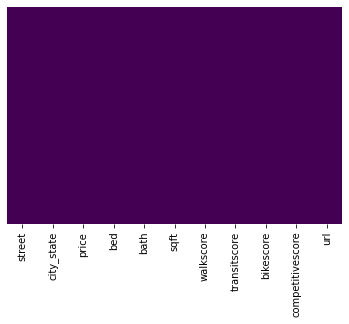

In [2489]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #no nulls observed in the data set

# Raw Data Cleaning

In [2541]:

df=pd.read_csv('scrape_data_v1_CAPSTONE.csv',index_col=0)
# df['price']=df['price'].str.replace("+","")
df['price']=list(map(lambda x:int(x),df['price'])) # converting extracted price information from text to integer
df['sqft']=df['sqft'].str.replace(",","")
df['sqft']=df['sqft'].str.replace("Sq Ft","") # replacing special characters in sqft & price attribute to clean the data
df['walkscore']=df['walkscore'].str.replace(" / 100","")
df['transitscore']=df['transitscore'].str.replace(" / 100","")
df['bikescore']=df['bikescore'].str.replace(" / 100","")
df['bed']=df['bed'].str.replace("Beds", '')
df['bed']=df['bed'].str.replace("Bed", '')
df['bath']=df['bath'].str.replace("Baths","")
df['bath']=df['bath'].str.replace("Bath","")


df=df[df['sqft'].str.contains("Lot")==False] #field with acres information is of no use in this context and we will drop those rows
df=df[df['sqft'].str.contains("—")==False]
df=df[df['bed'].str.contains("—")==False]
df=df[df['bath'].str.contains("—")==False]

df['sqft']=list(map(lambda x:int(x),df['sqft'])) # converting extracted sqft information from text to integer



# df['price_per_sqft']=df['price']/df['sqft']
# df['price_per_sqft']=list(map(lambda x:int(x),df['price_per_sqft']))
df['competitivescore'] = df['competitivescore'].str.extract('(\d+)', expand=True)
df.dropna(axis=0,subset=['street', 'city_state', 'price', 'sqft',
       'walkscore', 'transitscore', 'bikescore', 'competitivescore','bed'],inplace=True)                  #drop nulls because some entries have only unique records which inappropriately biases the model

df.drop_duplicates(inplace=True)


df.drop('url',axis=1,inplace=True) #dropping url column
df.drop('street',axis=1,inplace=True)



df['walkscore']=df['walkscore'].astype(int) # converting walkscore to integer
df['transitscore']=df['transitscore'].astype(int) # converting transitscore to integer
df['bikescore']=df['bikescore'].astype(int) # converting bikescore to integer
df['competitivescore']=df['competitivescore'].astype(int) # converting bikescore to integer

df['zip']=df['city_state'].str.extract(r'(\d{5}\-?\d{0,4})')
df.dropna(axis=0,subset=['zip'],inplace=True) 
df['zip']=df.zip.apply(lambda x:x[:5]) 
df['zip']=list(map(lambda x:int(x),df['zip']))

df['bed']=list(map(lambda x:int(x),df['bed']))
df['bath']=list(map(lambda x:float(x),df['bath']))
df.drop('city_state',axis=1,inplace=True)

df



,price,bed,bath,sqft,walkscore,transitscore,bikescore,competitivescore,zip
0,1145000,3,2.0,1641,35,0,79,93,94550
1,1079000,3,2.0,1791,16,32,7,88,94602
2,799000,2,2.0,1465,57,42,53,85,94538
3,949000,3,1.5,1092,17,0,27,92,94541
4,1399000,3,2.5,2046,41,37,51,92,94545
...,...,...,...,...,...,...,...,...,...
1394,4150000,4,5.0,3744,1,0,1,14,90210
1395,289000,2,2.0,936,33,0,43,71,93536
1396,1649000,3,2.0,1830,56,0,77,73,91107
1397,1290000,3,1.0,1452,77,46,34,47,90026


<AxesSubplot:>

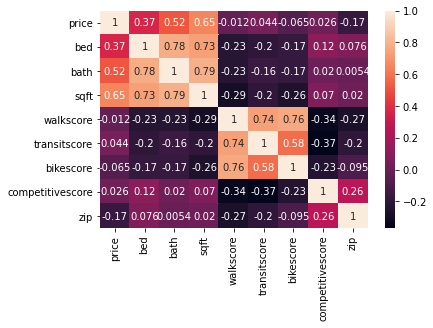

In [2542]:
sns.heatmap(df.corr(),annot=True)

# Checking for relation between Price and SQFT and also for outliers if any

Text(0, 0.5, 'SQFT')

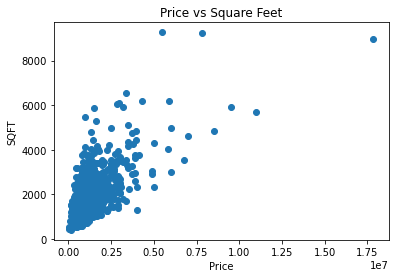

In [2543]:
plt.scatter(df['price'],df['sqft'])
plt.title('Price vs Square Feet')
plt.xlabel("Price")
plt.ylabel("SQFT")

# Checking for Normality of data

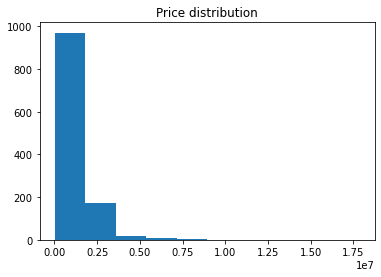

In [2544]:
plt.hist(df.price)
plt.title("Price distribution")
plt.show()


# Restricting dataset to have properties less than 4000 sqft

In [2545]:
df=df[df['sqft']<=4000]

# Checking again Price VS Sqft for outliers if any

Text(0.5, 1.0, 'Price vs Square Feet')

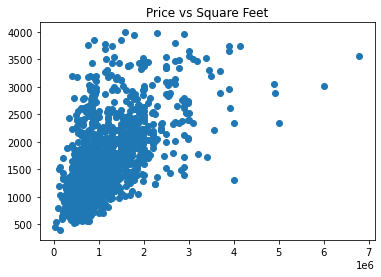

In [2546]:
plt.scatter(df['price'],df['sqft'])
plt.title('Price vs Square Feet')

# Count by Number of beds

In [2547]:
df.groupby(by='bed',sort='bed').count()

,price,bath,sqft,walkscore,transitscore,bikescore,competitivescore,zip
bed,,,,,,,,
1,79,79,79,79,79,79,79,79
2,250,250,250,250,250,250,250,250
3,406,406,406,406,406,406,406,406
4,295,295,295,295,295,295,295,295
5,80,80,80,80,80,80,80,80
6,13,13,13,13,13,13,13,13
7,5,5,5,5,5,5,5,5
8,7,7,7,7,7,7,7,7
9,3,3,3,3,3,3,3,3


# Restricting beds to 5 maximum and price to $1.50 million

In [2548]:
df=df[df['bed']<=5]
df=df[df['price']<=1500000]
df.groupby(by='bed',sort='bed').count()

,price,bath,sqft,walkscore,transitscore,bikescore,competitivescore,zip
bed,,,,,,,,
1,78,78,78,78,78,78,78,78
2,224,224,224,224,224,224,224,224
3,318,318,318,318,318,318,318,318
4,179,179,179,179,179,179,179,179
5,43,43,43,43,43,43,43,43


# Checking for Outliers

In [2549]:
def remove_outlier_IQR(df):            #outlier removal using IQR method
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final
df_outlier_removed=remove_outlier_IQR(df)
df_outlier_removed=pd.DataFrame(df_outlier_removed)
ind_diff=df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final  

In [2550]:
len(df)

842

# Price by number of beds

Text(0.5, 1.0, 'Price vs Bedrooms')

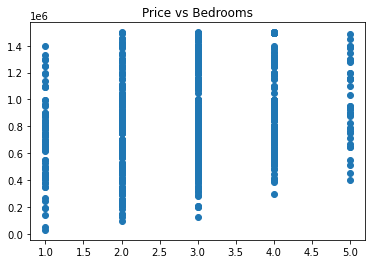

In [2551]:
plt.scatter(df['bed'],df['price'])
plt.title('Price vs Bedrooms')

# Normalisation of features except zipcode feature

In [2552]:
from sklearn.preprocessing import MinMaxScaler
for i in df.columns[df.columns!='zip']:
    df[i]=MinMaxScaler().fit_transform(np.array(df[i]).reshape(-1,1))

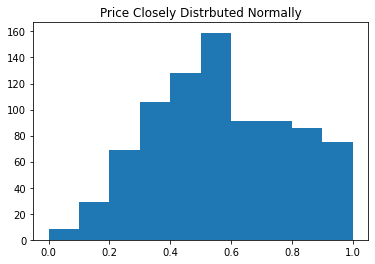

In [2553]:
plt.hist(df.price)
plt.title('Price Closely Distrbuted Normally')
plt.show()

In [2554]:
df

,price,bed,bath,sqft,walkscore,transitscore,bikescore,competitivescore,zip
0,0.758586,0.50,0.285714,0.360337,0.35,0.00,0.79,0.948980,94550
1,0.713703,0.50,0.285714,0.403891,0.16,0.32,0.07,0.897959,94602
2,0.523291,0.25,0.285714,0.309233,0.57,0.42,0.53,0.867347,94538
3,0.625298,0.50,0.142857,0.200929,0.17,0.00,0.27,0.938776,94541
4,0.931316,0.50,0.428571,0.477933,0.41,0.37,0.51,0.938776,94545
...,...,...,...,...,...,...,...,...,...
1392,0.516491,0.50,0.285714,0.335075,0.24,0.00,0.29,0.755102,91745
1393,0.285889,0.00,0.000000,0.034262,0.09,0.00,0.26,0.653061,93543
1395,0.176471,0.25,0.285714,0.155633,0.33,0.00,0.43,0.724490,93536
1397,0.857191,0.50,0.000000,0.305459,0.77,0.46,0.34,0.479592,90026


# We have 194 unique zipcodes

In [2555]:
df.groupby(by='zip',sort='zip').count()

,price,bed,bath,sqft,walkscore,transitscore,bikescore,competitivescore
zip,,,,,,,,
90015,1,1,1,1,1,1,1,1
90025,1,1,1,1,1,1,1,1
90026,1,1,1,1,1,1,1,1
90042,1,1,1,1,1,1,1,1
90043,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
95366,10,10,10,10,10,10,10,10
95376,10,10,10,10,10,10,10,10
95377,9,9,9,9,9,9,9,9


# Clustering zipcodes to have less discrete values based on proximity

In [2556]:
df['zipgroup']=''
df.sort_values(by='zip', axis=0, ascending=True, inplace=True)
df.reset_index(inplace=True)
zipgroups=[i for i in range(df['zip'].min(),df['zip'].max()+60,60)]
for j in range(len(df['zip'])):
    if df['zip'][j]<=zipgroups[1]: 
            df['zipgroup'][j]=zipgroups[1]
    else:
        df['zipgroup'][j]=zipgroups[2]
        zipgroups.pop(1)
        
        
df.drop('zip',axis=1,inplace=True)
df.drop('index',axis=1,inplace=True)

df



/var/folders/wm/mb338tpx7lbghdtfpfyk8whc0000gn/T/ipykernel_15226/1841170447.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zipgroup'][j]=zipgroups[1]
/var/folders/wm/mb338tpx7lbghdtfpfyk8whc0000gn/T/ipykernel_15226/1841170447.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zipgroup'][j]=zipgroups[2]


,price,bed,bath,sqft,walkscore,transitscore,bikescore,competitivescore,zipgroup
0,0.404956,0.00,0.000000,0.139373,0.93,1.00,0.84,0.479592,90075
1,0.659164,0.25,0.285714,0.301394,0.90,0.55,0.56,0.438776,90075
2,0.857191,0.50,0.000000,0.305459,0.77,0.46,0.34,0.479592,90075
3,0.897314,0.75,0.571429,0.751452,0.54,0.49,0.47,0.734694,90075
4,0.727304,0.50,0.285714,0.360046,0.58,0.00,0.49,0.489796,90075
...,...,...,...,...,...,...,...,...,...
837,0.768786,1.00,0.571429,0.899245,0.11,0.00,0.29,0.948980,95415
838,0.590955,0.75,0.571429,0.488095,0.09,0.00,0.31,0.938776,95415
839,0.795920,0.75,0.571429,0.563008,0.07,0.00,0.28,0.948980,95415
840,0.653111,0.75,0.571429,0.604239,0.05,0.00,0.27,0.938776,95415


# One Hot enconding for grouped Zipcodes

In [2557]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['zipgroup']]).toarray())

#merge one-hot encoded columns back with original DataFrame
df = df.join(encoder_df)
df.drop('zipgroup',axis=1,inplace=True)
df

,price,bed,bath,sqft,walkscore,transitscore,bikescore,competitivescore,0,1,...,81,82,83,84,85,86,87,88,89,90
0,0.404956,0.00,0.000000,0.139373,0.93,1.00,0.84,0.479592,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.659164,0.25,0.285714,0.301394,0.90,0.55,0.56,0.438776,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.857191,0.50,0.000000,0.305459,0.77,0.46,0.34,0.479592,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.897314,0.75,0.571429,0.751452,0.54,0.49,0.47,0.734694,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.727304,0.50,0.285714,0.360046,0.58,0.00,0.49,0.489796,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,0.768786,1.00,0.571429,0.899245,0.11,0.00,0.29,0.948980,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
838,0.590955,0.75,0.571429,0.488095,0.09,0.00,0.31,0.938776,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
839,0.795920,0.75,0.571429,0.563008,0.07,0.00,0.28,0.948980,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
840,0.653111,0.75,0.571429,0.604239,0.05,0.00,0.27,0.938776,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# MODEL CREATION - LINEAR REGRESSION, SVR, XGBOOST, LASSO, RIDGE, FOREST REGRESSOR

In [2558]:
# Considering zipcodes LM
data = df.values
# split into inpiut and output elements
X, y = data[:,1:],data[:, :1]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
# fit the model
model = LinearRegression()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train, y_train)
# evaluate the model)
y_pred = model.predict(X_test)
# evaluate predictions
 # Regression metrics
explained_variance=metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 
r2=metrics.r2_score(y_test, y_pred)

print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('RMSE: ', round(np.sqrt(mse),4))

Mean MAE: 188177189555.581 (310304864458.248)
explained_variance:  -1.7288557076612618e+25
r2:  -1.7304011751602693e+25
MAE:  201750557716.6864
RMSE:  902314802494.288


In [2559]:
# Lasso Regression

model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train, y_train)
# evaluate the model)
y_pred = model.predict(X_test)
# evaluate predictions
 # Regression metrics
explained_variance=metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 
r2=metrics.r2_score(y_test, y_pred)

print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('RMSE: ', round(np.sqrt(mse),4))

Mean MAE: 0.189 (0.012)
explained_variance:  0.0
r2:  -0.0011
MAE:  0.1834
RMSE:  0.217


In [2560]:
# Considering zipcodes RIDGE 
# fit the model
model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train, y_train)
# evaluate the model)
y_pred = model.predict(X_test)
# evaluate predictions
 # Regression metrics
explained_variance=metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 
r2=metrics.r2_score(y_test, y_pred)

print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('RMSE: ', round(np.sqrt(mse),4))

Mean MAE: 0.113 (0.008)
explained_variance:  0.6331
r2:  0.6319
MAE:  0.1052
RMSE:  0.1316


In [2561]:
# XGBoost Algorithm
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
explained_variance=metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 
r2=metrics.r2_score(y_test, y_pred)
print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('RMSE: ', round(np.sqrt(mse),4))

Mean MAE: 0.109 (0.009)
explained_variance:  0.6327
r2:  0.6321
MAE:  0.1042
RMSE:  0.1316


In [2562]:
# SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='poly')
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

explained_variance=metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 
r2=metrics.r2_score(y_test, y_pred)
print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('RMSE: ', round(np.sqrt(mse),4))

Mean MAE: 0.104 (0.009)
explained_variance:  0.6424
r2:  0.6394
MAE:  0.0991
RMSE:  0.1303


/Users/mahavir/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2563]:
# Forest regressor
 
 # create regressor object
regressor = RandomForestRegressor(random_state = 0)
 
# fit the regressor with x and y data
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(regressor, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

explained_variance=metrics.explained_variance_score(y_test, y_pred)
mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
mse=metrics.mean_squared_error(y_test, y_pred) 
r2=metrics.r2_score(y_test, y_pred)
print('explained_variance: ', round(explained_variance,4))    
print('r2: ', round(r2,4))
print('MAE: ', round(mean_absolute_error,4))
print('RMSE: ', round(np.sqrt(mse),4))


Mean MAE: 0.104 (0.009)


/var/folders/wm/mb338tpx7lbghdtfpfyk8whc0000gn/T/ipykernel_15226/2658469484.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


explained_variance:  0.6251
r2:  0.6199
MAE:  0.1066
RMSE:  0.1337
